In [1]:
from datetime import datetime

import numpy as np
import stackstac
import pystac_client
import planetary_computer as pc

import ipyleaflet
import IPython.display as dsp
import ipywidgets as widgets 

from dask_gateway import GatewayCluster

In [2]:
cluster = GatewayCluster()  # Creates the Dask Scheduler. Might take a minute.

client = cluster.get_client()

cluster.adapt(minimum=4, maximum=8)
print(cluster.dashboard_link)

https://pccompute.westeurope.cloudapp.azure.com/compute/services/dask-gateway/clusters/prod.bfc46b60d0204a20bcb496f844d1db14/status


In [3]:
m = ipyleaflet.Map(scroll_wheel_zoom=True)
m.center = -4.313, 20.370
m.zoom = 12
m.layout.height = "500px"
m.layout.width = "500px"

m

Map(center=[-4.313, 20.37], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [4]:
bbox = (m.west, m.south, m.east, m.north)
bbox
start = "2019-05-01"
end = "2019-08-30"
bbox, start, end

((20.284194946289062,
  -4.398444450419975,
  20.45585632324219,
  -4.2272692341828355),
 '2019-05-01',
 '2019-08-30')

In [5]:
pcurl = "https://planetarycomputer.microsoft.com/api/stac/v1"
catalog = pystac_client.Client.open(pcurl)

search = catalog.search(
    collections=["sentinel-2-l2a"], 
    bbox=bbox, 
    datetime=f"{start}/{end}"
)
print(f"{search.matched()} Items")


48 Items


In [6]:
items = search.items_as_collection()
items = pystac_client.ItemCollection(pc.sign_assets(item) for item in items.features)

In [7]:
dsp.GeoJSON(items.to_dict())

<IPython.display.GeoJSON object>

In [8]:
dsp.JSON(items.to_dict())

<IPython.core.display.JSON object>

In [9]:
print(bbox)
stack = stackstac.stack(items, assets=["B02", "B03", "B04", "B08"], bounds_latlon=bbox, epsg=4326).where(lambda x: x > 0, other=np.nan)
stack

(20.284194946289062, -4.398444450419975, 20.45585632324219, -4.2272692341828355)


<xarray.DataArray 'stackstac-2dd925d52ccc7a8127c75e9c6b12b1eb' (time: 48, band: 4, y: 1891, x: 1905)>
dask.array<where, shape=(48, 4, 1891, 1905), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/46)
  * time                                     (time) datetime64[ns] 2019-05-02...
    id                                       (time) <U65 'S2B_MSIL2A_20190502...
  * band                                     (band) <U3 'B02' 'B03' 'B04' 'B08'
  * x                                        (x) float64 20.28 20.28 ... 20.46
  * y                                        (y) float64 -4.227 ... -4.398
    s2:water_percentage                      (time) float64 1.411 ... 0.4176
    ...                                       ...
    proj:bbox                                object {399960.0, 509760.0, 9600...
    gsd                                      float64 10.0
    common_name                              (band) <U5 'blue' 'green' ... 'nir'
    center_wavelength                        (band) float64 0.49 0.56 ... 0.842
    full_width_half_max                      (band) float64 0.098 ... 0.145
    epsg                                     int64 4326
Attributes:
    spec:           RasterSpec(epsg=4326, bounds=(20.284181987386525, -4.3984...
    crs:            epsg:4326
    transform:      | 0.00, 0.00, 20.28|\n| 0.00,-0.00,-4.23|\n| 0.00, 0.00, ...
    resolution_xy:  (9.012388140305916e-05, 9.054801413643787e-05)

In [10]:
lowcloud = stack[stack["eo:cloud_cover"] < 20]
print(lowcloud)
rgb = stack.sel(band=["B04", "B03", "B02"])
rgb

<xarray.DataArray 'stackstac-2dd925d52ccc7a8127c75e9c6b12b1eb' (time: 16, band: 4, y: 1891, x: 1905)>
dask.array<getitem, shape=(16, 4, 1891, 1905), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/46)
  * time                                     (time) datetime64[ns] 2019-06-11...
    id                                       (time) <U65 'S2B_MSIL2A_20190611...
  * band                                     (band) <U3 'B02' 'B03' 'B04' 'B08'
  * x                                        (x) float64 20.28 20.28 ... 20.46
  * y                                        (y) float64 -4.227 ... -4.398
    s2:water_percentage                      (time) float64 1.45 1.08 ... 0.8635
    ...                                       ...
    proj:bbox                                object {399960.0, 509760.0, 9600...
    gsd                                      float64 10.0
    common_name                              (band) <U5 'blue' 'green' ... 'nir'
    center_wa

<xarray.DataArray 'stackstac-2dd925d52ccc7a8127c75e9c6b12b1eb' (time: 48, band: 3, y: 1891, x: 1905)>
dask.array<getitem, shape=(48, 3, 1891, 1905), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/46)
  * time                                     (time) datetime64[ns] 2019-05-02...
    id                                       (time) <U65 'S2B_MSIL2A_20190502...
  * band                                     (band) <U3 'B04' 'B03' 'B02'
  * x                                        (x) float64 20.28 20.28 ... 20.46
  * y                                        (y) float64 -4.227 ... -4.398
    s2:water_percentage                      (time) float64 1.411 ... 0.4176
    ...                                       ...
    proj:bbox                                object {399960.0, 509760.0, 9600...
    gsd                                      float64 10.0
    common_name                              (band) <U5 'red' 'green' 'blue'
    center_wavelength                        (band) float64 0.665 0.56 0.49
    full_width_half_max                      (band) float64 0.038 0.045 0.098
    epsg                                     int64 4326
Attributes:
    spec:           RasterSpec(epsg=4326, bounds=(20.284181987386525, -4.3984...
    crs:            epsg:4326
    transform:      | 0.00, 0.00, 20.28|\n| 0.00,-0.00,-4.23|\n| 0.00, 0.00, ...
    resolution_xy:  (9.012388140305916e-05, 9.054801413643787e-05)

In [11]:
# monthly = rgb.resample(time="MS").median("time", keep_attrs=True)
# monthly

In [12]:
import dask.diagnostics
with dask.diagnostics.ProgressBar():
    data = rgb.median("time").compute()

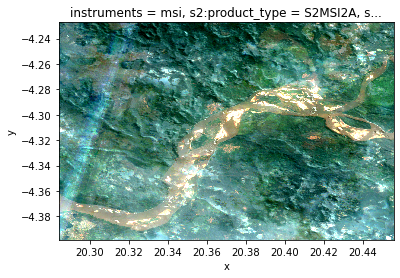

In [33]:
data.plot.imshow(rgb="band", robust=True)

In [34]:
data

<xarray.DataArray 'stackstac-3ba87416600ef9c421442d2333bbbd30' (band: 3, y: 1891, x: 1905)>
array([[[ 967.5,  939.5,  922. , ...,  930.5,  946.5,  946. ],
        [ 955. ,  942.5,  939.5, ...,  943. ,  942.5,  945.5],
        [ 962.5,  943.5,  957.5, ...,  935. ,  944. ,  963. ],
        ...,
        [1196. , 1166. , 1138. , ..., 1042. , 1035. , 1046. ],
        [1236. , 1230. , 1196. , ..., 1045. , 1039. , 1043. ],
        [1214. , 1208. , 1224. , ..., 1041. , 1057. , 1046. ]],

       [[1150. , 1093. , 1099. , ..., 1096.5, 1091.5, 1115.5],
        [1131. , 1108. , 1092. , ..., 1106. , 1109.5, 1106.5],
        [1122. , 1130. , 1110. , ..., 1120. , 1095. , 1105.5],
        ...,
        [1380. , 1394. , 1366. , ..., 1216. , 1234. , 1242. ],
        [1386. , 1404. , 1390. , ..., 1229. , 1222. , 1230. ],
        [1394. , 1394. , 1372. , ..., 1217. , 1242. , 1248. ]],

       [[1127. , 1125. , 1109. , ..., 1066. , 1086.5, 1078. ],
        [1119. , 1097. , 1075.5, ..., 1081. , 1088.5, 1100.5],
        [1105. , 1100. , 1083.5, ..., 1093.5, 1094.5, 1111.5],
        ...,
        [1356. , 1376. , 1342. , ..., 1225. , 1237. , 1244. ],
        [1394. , 1396. , 1360. , ..., 1244. , 1228. , 1226. ],
        [1380. , 1400. , 1354. , ..., 1225. , 1223. , 1233. ]]])
Coordinates: (12/23)
  * band                                     (band) <U3 'B04' 'B03' 'B02'
  * x                                        (x) float64 20.28 20.28 ... 20.46
  * y                                        (y) float64 -4.227 ... -4.398
    instruments                              <U3 'msi'
    s2:product_type                          <U7 'S2MSI2A'
    s2:snow_ice_percentage                   float64 0.0
    ...                                       ...
    proj:shape                               object {10980}
    title                                    (band) <U14 'Band 4 - Red' ... '...
    common_name                              (band) <U5 'red' 'green' 'blue'
    center_wavelength                        (band) float64 0.665 0.56 0.49
    full_width_half_max                      (band) float64 0.038 0.045 0.098
    epsg                                     int64 4326